This is a sample implementation of a K Nearest Neighbor Model using a sample dataset

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

# Fetch our Data

In [19]:
df = pd.read_csv('datasets/KNN_Project_Data')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

Create a StandardScaler() object called scaler

In [20]:
scaler = StandardScaler()

Fit scaler to the features

In [21]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

Use the .transform() method to transform the features to a scaled version

In [22]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.

In [23]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train the Data

Use train_test_split to split your data into a training set and a testing set

In [24]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

# Using KNN

Create a KNN model instance with n_neighbors=1

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)

Fit this KNN model to the training data

In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations

Use the predict method to predict values using your KNN model and X_test

In [27]:
pred = knn.predict(X_test)

Create a confusion matrix and classification report.

In [28]:
print(confusion_matrix(y_test,pred))

[[109  36]
 [ 44 111]]


In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       145
           1       0.76      0.72      0.74       155

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



# Choosing a K Value

Use the elbow method to pick an appropriate K value. We will use a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.

In [30]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Create a plot using the information from the loop

Text(0, 0.5, 'Error Rate')

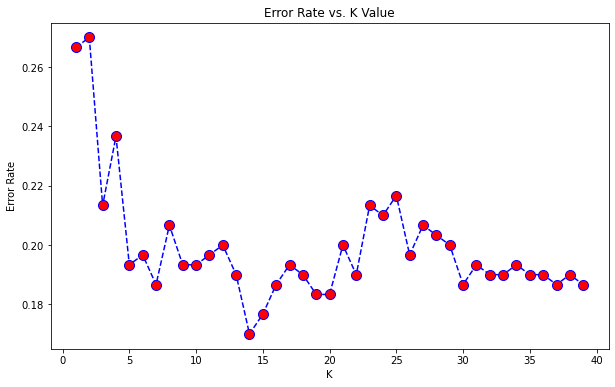

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after aroun K>33 the error rate just tends to hover around .19. Let's retrain the model with that and check the classification report.

# Retrain with new K Value

In [32]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[109  36]
 [ 44 111]]


              precision    recall  f1-score   support

           0       0.71      0.75      0.73       145
           1       0.76      0.72      0.74       155

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



In [35]:
# NOW WITH K=24
knn = KNeighborsClassifier(n_neighbors=33)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=32')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=32


[[117  28]
 [ 29 126]]


              precision    recall  f1-score   support

           0       0.80      0.81      0.80       145
           1       0.82      0.81      0.82       155

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300

